# Digit recognizer in Python

## Import necessary packages

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import math
from sklearn.cross_validation import train_test_split
from scipy.optimize import fmin_cg
from sklearn.metrics import accuracy_score
%matplotlib inline

## Load data

In [6]:
data = scipy.io.loadmat('/Users/Grant/data-science/neural-network/digits.mat')
X = data["X"]
y = data["y"]
y[y==10]=0

## Split data into testing and training sets

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=0)

## Define parameters specific to the data

In [8]:
m = np.float(X.shape[0]) # total number of examples
mtrain = np.float(Xtrain.shape[0]) # Number of training examples
mtest = np.float(Xtest.shape[0]) # Number of testing examples
n = np.float(X.shape[1]) # Number of features
classes = 10
ytrain_matrix = np.eye(classes)[ytrain].reshape(mtrain,classes)
ytest_matrix = np.eye(classes)[ytest].reshape(mtest,classes)

## Model specific parameters

In [9]:
nodes = 10
Lambda = 3
maxiter = 200

## Code to visualize 100 random digits

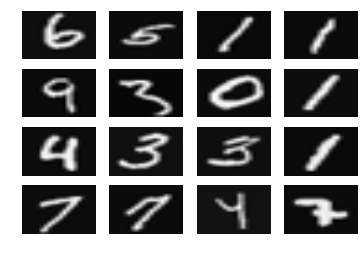

In [13]:
def drawplot(draw):
    if draw:
        idx = np.random.randint(m,size=16)
        fig, ax = plt.subplots(4, 4)
        img_size = math.sqrt(n)
        for i in range(4):
            for j in range(4):
                Xi = X[idx[i*4+j],:].reshape(img_size, img_size).T
                ax[i, j].set_axis_off() # Turns off the axes for all the subplots
                ax[i,j].imshow(Xi, aspect='auto',cmap='gray')
        plt.show()
drawplot(True)

## Sigmoid activation function

In [14]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-1 * z))

## Predict function

In [15]:
def predict(theta,x):
    # Unroll the theta values as before
    theta1 = theta[:(n+1)*nodes].reshape((nodes,(n+1)))
    theta2 = theta[(n+1)*nodes:].reshape((classes,(nodes+1)))
    
    m = np.float(x.shape[0])
    
    #Forward propagation (also as before!)
    a1 = np.concatenate((np.ones((1,m)).T,x),axis=1)
    z2 = a1.dot(theta1.T)
    a2 = np.concatenate((np.ones((1,m)).T,sigmoid(z2)),axis=1)
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    return np.argmax(a3, axis=1)

## Neural network function

In [16]:
def nn(theta):

    # Unroll thetas
    theta1 = theta[:(n+1)*nodes].reshape((nodes,(n+1))) # [Hiddden X n + 1] = [10X401]
    theta2 = theta[(n+1)*nodes:].reshape((classes,(nodes+1))) # [classes X nodes + 1] = [10X11]

    # Forward propagation
    a1 = np.concatenate((np.ones((1,mtrain)).T,Xtrain),axis=1) # [m X n + 1] = [3750X401]
    z2 = a1.dot(theta1.T) # [m X nodes] = [3750X10]
    a2 = np.concatenate((np.ones((1,mtrain)).T,sigmoid(z2)),axis=1) # [m X nodes + 1] = [3750X11]
    z3 = a2.dot(theta2.T) # [m X classes] = [3750X10]
    a3 = sigmoid(z3) # [m X classes] = [3750X10]

    # Cost function
    J = np.sum(-ytrain_matrix*np.log(a3) - (1-ytrain_matrix)*(np.log(1-a3)))/mtrain + ((Lambda/(2*mtrain)) * (np.sum(theta1[:,1:]**2) + np.sum(theta2[:,1:]**2)))
        

    # Backpropagation
    d3 = (a3 - ytrain_matrix) # [m X classes] = [3750X10]
    d2 = (a3 - ytrain_matrix).dot(theta2) * (a2*(1-a2)) # [m X nodes+1] = [3750X11]
    D1 = d2[:,1:].T.dot(a1)/mtrain # [nodes X n + 1] = [10X401]
    D2 = d3.T.dot(a2)/mtrain # [n X nodes + 1] = [10X11]
    if Lambda!=0:
        D1[:,1:] += (Lambda/mtrain * theta1[:,1:]) # [nodes X n + 1] = [3X3]
        D2[:,1:] += (Lambda/mtrain * theta2[:,1:]) # [classes X nodes + 1] = [2X4]

    # Roll grads D1 and D2 into 1D array
    grads = np.concatenate((D1.reshape(((n+1)*nodes)),D2.reshape(((nodes+1)*classes))))

    return J, grads

## Mini-functions to return either cost or gradient from the nn() function

In [ ]:
def cost(theta):
    return nn(theta)[0]

def grad(theta):
    return nn(theta)[1]

## Random intialization function

In [18]:
def randtheta(L_in,L_out):
        #np.random.seed(0)
        rand_epsilon = np.sqrt(6) / np.sqrt(L_in+L_out)
        theta = (np.random.random((L_out, L_in + 1)) *(2*rand_epsilon)) - rand_epsilon
        return theta

## Call the functions to train the model

In [20]:
theta_init = np.concatenate((randtheta(n,nodes).reshape(((n+1)*nodes)),randtheta(nodes,classes).reshape(((nodes+1)*classes))))
model = fmin_cg(cost, x0=theta_init, fprime=grad, full_output=1, disp=0, maxiter=maxiter);
theta = model[0]
print "The cost is %f" %(model[1])
print "The accuracy is on the training set is %f" %(accuracy_score(ytrain, predict(theta,Xtrain)))
print "The accuracy is on the testing set is %f" %(accuracy_score(ytest, predict(theta,Xtest)))

The cost is 0.768261
The accuracy is on the training set is 0.956800
The accuracy is on the testing set is 0.924000


## Printer() function to demonstrate the model

This function selects a random digit from the entire data set and draws a figure. Then it passes the features to the predict function, which returns the predicted digit. The figure is plotted and the predicted digit is included in the title.

In [21]:
def printer():
    idx = np.random.randint(m,size=1)
    img_size = math.sqrt(n)
    Xi = X[idx,:].reshape(img_size,img_size).T
    yi = predict(theta,X[idx,:])[0]
    plt.title('The predicted value is %i' %(yi))
    plt.imshow(Xi, aspect='auto',cmap='gray')
    plt.axis('off')
    plt.show()

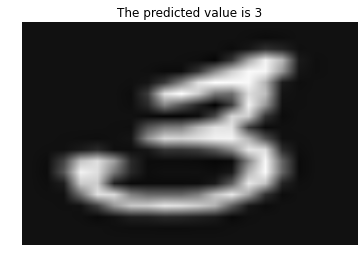

In [36]:
printer()